 <u><h1 style='font-size:45px; text-align:center'><font color = blue>Big</font><font color = orange>Mart </font><font color = grey> Sales</font><br/></h1></u>


# <u>Introduction</u>

     Bigmart is a big supermarket chain, with stores all around the country. One could easily locate Big Mart store in all the major localities, residential areas, high streets, offices, and metro stations.


# <u>Problem Statement</u>

    The data scientists at Big Mart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to make an EDA report to find out the trend of sales of each product at a particular store.

# <u>Hypothesis Generation</u>

   Following are some of the hypotheses based on the problem statement:
   

1.  Sales are higher during weekends.
1.  Higher sales during morning and late evening.
1.  Higher sales during end of the year.
1.  Store size affects the sales.
1.  Location of the store affects the sales.
1.  Items with more shelf space sell more.

# <u>Import Libraries</u>

In [102]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# <u>Data Acquistion</u>

    Collecting required data.

In [103]:
#using pandas read_csv to read as csv file as dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Pranjulcr7/Big_Mart_Sales_EDA/master/Big_mart.csv")


# <u>Data Exploration/Analysis</u>
    The aim of this section is to identify any potential issues with the features and decide on how to
    handle those issues. The primary concern is with outliers and unexpected distributions, though we
    might potentially encounter issues such as unexpected scales.
    
##  Data Description

1.  **Item_Identifier :** Unique Product ID

1.  **Item_Weight :** Weight of product

1.   **Item_Fat_Content :** Wether the product is low fat or not

1.   **Item_Visibility :** percentage of total display area in store allocated to this product

1.   **Item_Type :** Category to which product belongs

1.   **Item_MRP :** Maximum Retail Price (list price) of product

1.   **Outlet_Identifier :** Unique Store ID

1.   **Outlet_Establishment_Year :** Year in which store was established

1.   **Outlet_Size :** Size of the store

1.   **Outlet_Location_Type :** Type of city in which the store is located
   
1.   **Outlet_Type :** Grocery store or some sort of supermarket

1.   **Item_Outlet_Sales :** Sales of product in particular store. This is the outcome variable to be predicted.



In [104]:
#head method to see first five rows of data frame and transposing the returned matrix 
df.head().T

,0,1,2,3,4
Item_Identifier,FDA15,DRC01,FDN15,FDX07,NCD19
Item_Weight,9.3,5.92,17.5,19.2,8.93
Item_Fat_Content,Low Fat,Regular,Low Fat,Regular,Low Fat
Item_Visibility,0.0160473,0.0192782,0.0167601,0,0
Item_Type,Dairy,Soft Drinks,Meat,Fruits and Vegetables,Household
Item_MRP,249.809,48.2692,141.618,182.095,53.8614
Outlet_Identifier,OUT049,OUT018,OUT049,OUT010,OUT013
Outlet_Establishment_Year,1999,2009,1999,1998,1987
Outlet_Size,Medium,Medium,Medium,NaN,High
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3


-  On the left are variables of the dataset and on the top are row's index, i.e. 0 to 4.
-  NaN represents null value.

## Dimensions of dataset

    

In [105]:
df.shape

(8523, 12)

Dataset has 8,523 rows and 12 columns.
    
    
## Basic statistics of dataset

In [106]:
#using describe method to see description of numeric columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


-  Median of the columns are index 50%, i.e. 50th percintile row.
-  Minimum value of Item_Visibility is 0. This is value is impractical, as item is being sold in store it's visibility cannot be 0.
-  All outlets were established between 1985 and 2009.

## Finding the data quality
    

In [107]:
#info method to see data frame information
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


-  There are 7 columns with object data type and 5 columns with numeric data type.
-  Item_Weight and Outlet_Size has null values, as there 8523 rows.

### Variables with missing values

In [108]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There 1,463 missin values in Item_Weight and 2,410 in Outlet_Size, which will be imputed later.

## Unique values in the categorical variables

In [109]:
#Using apply method to apply function on dataFrame
# using unique method to get unique values in each variable
df.apply( lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

-  Item_identifier has 1,559 values, that is number of products available in the store.
-  Item_type has 16 values, that is number of types of products available in the store.
-  Outlet_Identifier has 16 values, that is the number of outlets.

# <u>Univariate analysis</u>
    Summary statistics for each field in the data set.
    

## 1. Item_Outlet_Sales ( Target Variable)
    Sales of product in particular store. This is the outcome variable to be predicted.

### Description of Item_Outlet_Sales

In [110]:
df['Item_Outlet_Sales'].describe(percentiles=[1])

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
50%       1794.331000
100%     13086.964800
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

-  Variable is of float data type.
-  With range of values from 33.29 to 13,086.96 unit.
-  Mean is 2,181.29 unit.

### Distribution of Item_Outlet_Sales
    Since our target variable is continuous, we can visualise it by plotting its histogram.

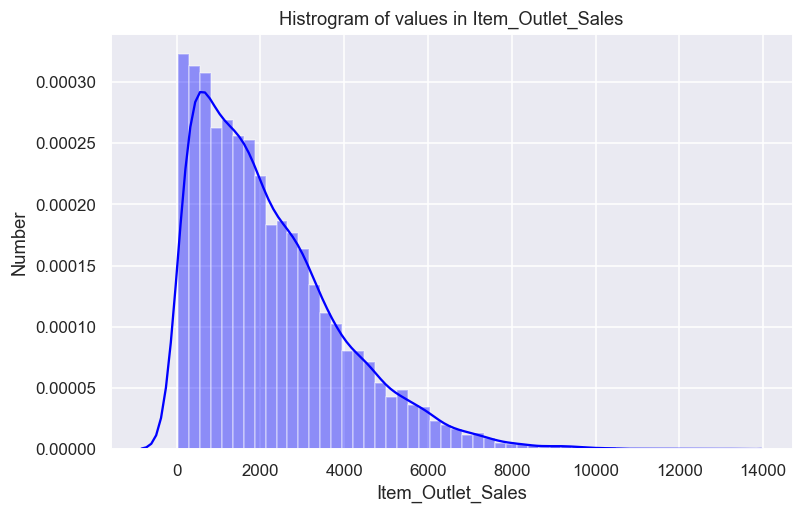

In [111]:
#Using seaborn distplot to plot histrogram excluding missing values
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':110})
sns.distplot(df.Item_Outlet_Sales, color='blue');
plt.ylabel('Number')
plt.xlabel('Item_Outlet_Sales')
plt.title('Histrogram of values in Item_Outlet_Sales');

In [112]:
print('Skewness = %.4f'%df['Item_Outlet_Sales'].skew())

Skewness = 1.1775


-  The graph is right skewed.
-  It can be infered that the graph has higher concentration on low sales.

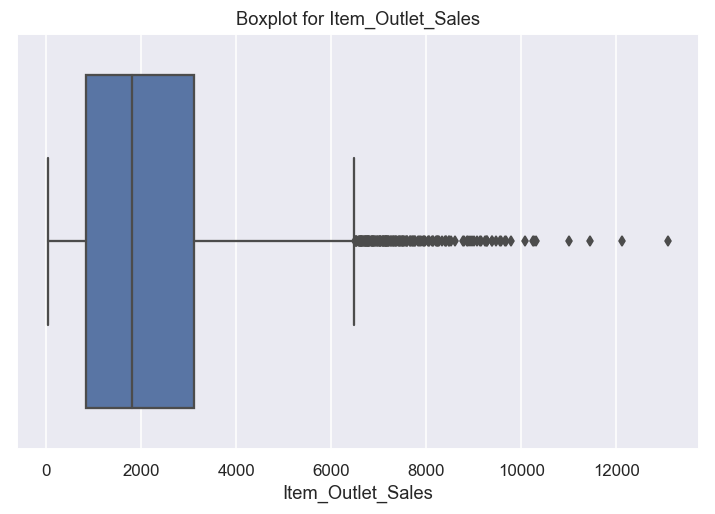

In [113]:
sns.boxplot(df.Item_Outlet_Sales);
plt.xlabel('Item_Outlet_Sales');
plt.title("Boxplot for Item_Outlet_Sales");

-  Median of the Item_Outlet_Sales is about 1,794.
-  There are many outliers on the right side of the 4th quartile, that tell us that there are very few high sales compared to low sales.

### Item_Outlet_Sales greater than third quartile
    Observing sales for Item_Outlet_Sales greater than 75th percentile.

In [114]:
df.sort_values(by='Item_Outlet_Sales', ascending = False)\
.head(10).set_index('Item_Outlet_Sales').T\

Item_Outlet_Sales,13086.9648,12117.56,11445.101999999999,10993.6896,10306.584,10256.649,10236.675,10072.8882,9779.9362,9678.0688
Item_Identifier,NCE42,FDQ19,FDZ20,FDP33,FDI50,FDF39,FDU14,NCH18,NCM05,FDC17
Item_Weight,NaN,NaN,NaN,NaN,NaN,14.85,NaN,NaN,6.825,NaN
Item_Fat_Content,Low Fat,Regular,Low Fat,Low Fat,Regular,Regular,Low Fat,Low Fat,Low Fat,Low Fat
Item_Visibility,0.0105509,0.0142956,0,0.0888399,0.0306933,0.0194951,0.0345844,0.044445,0.059847,0.0153859
Item_Type,Household,Fruits and Vegetables,Fruits and Vegetables,Snack Foods,Canned,Dairy,Dairy,Household,Health and Hygiene,Frozen Foods
Item_MRP,234.996,242.651,253.036,254.267,228.035,261.291,248.375,245.28,262.523,208.993
Outlet_Identifier,OUT027,OUT027,OUT027,OUT027,OUT027,OUT013,OUT027,OUT027,OUT046,OUT027
Outlet_Establishment_Year,1985,1985,1985,1985,1985,1987,1985,1985,1997,1985
Outlet_Size,Medium,Medium,Medium,Medium,Medium,High,Medium,Medium,Small,Medium
Outlet_Location_Type,Tier 3,Tier 3,Tier 3,Tier 3,Tier 3,Tier 3,Tier 3,Tier 3,Tier 1,Tier 3


It can be observed that there is more Item_Outlet_Sales for day-to-day products like household, groceries etc. and are mostly from Supermarket Type 3 or Tier 3 outlets.

## 2.  Item_Identifier 
    This variable is categorical variable and is a Unique Product id. Since branded items are more in demand, we will not drop this variable as it can be used to distinguish between product brands.
   

### Description of Item_Identifier 

In [115]:
df['Item_Identifier'].describe()

count      8523
unique     1559
top       FDW13
freq         10
Name: Item_Identifier, dtype: object

-  Variable is of object type
-  There are 1,559 unique products all over the stores.
-  Mode is 10 for product FDW13.

### Unique Item_Identifier Count

In [116]:
df.Item_Identifier.value_counts().head()

FDW13    10
FDG33    10
NCY18     9
FDW26     9
FDW49     9
Name: Item_Identifier, dtype: int64

In [117]:

print(df.loc[(df.Item_Identifier == 'FDW13'), ['Item_Identifier','Item_Fat_Content'\
    ,'Item_Type','Item_MRP']].set_index('Item_Identifier').head(1))\

print(df.loc[(df.Item_Identifier == 'FDG33'), ['Item_Identifier','Item_Fat_Content'\
    ,'Item_Type','Item_MRP']].set_index('Item_Identifier').head(1))\

                Item_Fat_Content Item_Type  Item_MRP
Item_Identifier                                     
FDW13                    Low Fat    Canned   51.1324
                Item_Fat_Content Item_Type  Item_MRP
Item_Identifier                                     
FDG33                    Regular   Seafood  170.4764


Items which are more in demand are Low-Fat canned items and Regular seafood items.

## 3.  Item_Weight 
    This variable is independent numeric variable which represents the weight of the product.
   

### Description of Item_Weight

In [118]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

-  Variable is of float data type.
-  With range of values from 4.55 to 21.35
-  Count of variable is 7,060. It can be inferred that there are null values present.

### Distribution of Item_Weight
    Since our target variable is continuous, we can visualise it by plotting its histogram.

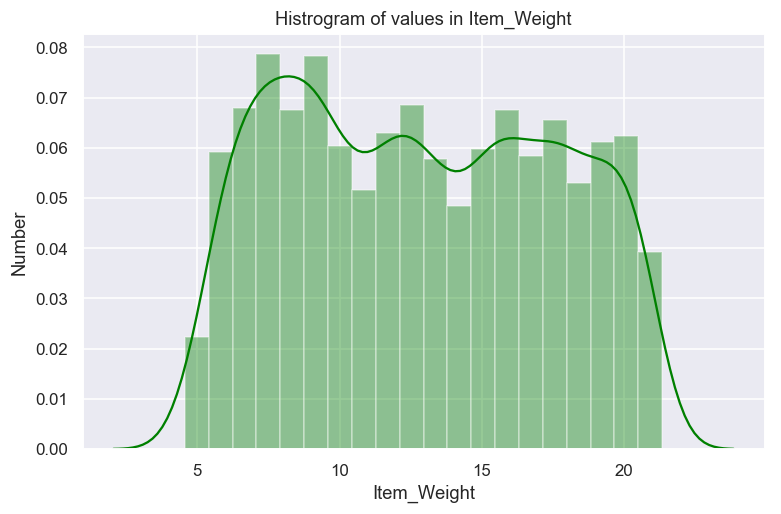

In [119]:
#Using seaborn distplot to plot histrogram excluding missing values
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':110})
sns.distplot(df.Item_Weight[df.Item_Weight.notnull()], color='green');
plt.ylabel('Number')
plt.xlabel('Item_Weight')
plt.title('Histrogram of values in Item_Weight');

In [120]:
print('Skewness = %.4f'%df['Item_Weight'].skew())

Skewness = 0.0824


There is no clear pattern in Item_Weight.

### Imputing missing values

#### Sum of missing values

In [121]:
print(' There are %d missing values in Item_Weight column.'
      %df['Item_Weight'].isnull().sum())

 There are 1463 missing values in Item_Weight column.


#### Mean of each item type

In [122]:
list_unique_items = df.Item_Type.unique()
mean_items = { i:df.loc[df.Item_Type==i,['Item_Weight']].mean() for i in list_unique_items}
mean_items

{'Dairy': Item_Weight    13.426069
 dtype: float64, 'Soft Drinks': Item_Weight    11.84746
 dtype: float64, 'Meat': Item_Weight    12.817344
 dtype: float64, 'Fruits and Vegetables': Item_Weight    13.224769
 dtype: float64, 'Household': Item_Weight    13.384736
 dtype: float64, 'Baking Goods': Item_Weight    12.277108
 dtype: float64, 'Snack Foods': Item_Weight    12.98788
 dtype: float64, 'Frozen Foods': Item_Weight    12.867061
 dtype: float64, 'Breakfast': Item_Weight    12.768202
 dtype: float64, 'Health and Hygiene': Item_Weight    13.142314
 dtype: float64, 'Hard Drinks': Item_Weight    11.400328
 dtype: float64, 'Canned': Item_Weight    12.305705
 dtype: float64, 'Breads': Item_Weight    11.346936
 dtype: float64, 'Starchy Foods': Item_Weight    13.690731
 dtype: float64, 'Others': Item_Weight    13.853285
 dtype: float64, 'Seafood': Item_Weight    12.552843
 dtype: float64}

Getting mean of weight of each item type and imputing in missing value for that particular item type to get more accurate mode.



#### Fill mean of Item_Weight of each Item_type inplace of missing values

In [123]:
# df['Item_Weight'] = df['Item_Weight'].fillna(0);
for i, m in mean_items.items():
    df.loc[df['Item_Type']==i,['Item_Weight']] = df.loc[df['Item_Type']==i,['Item_Weight']].fillna(m);

### Distribution of Item_Weight after imputing missing values
    Visualise it by plotting its histogram.

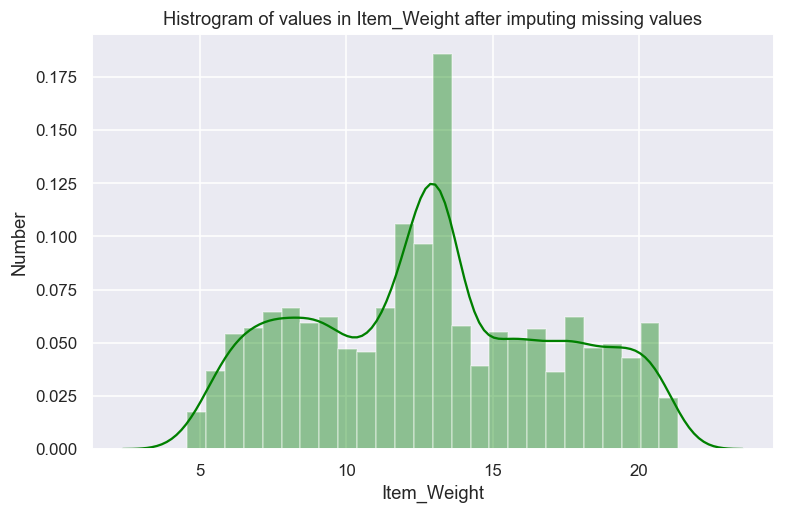

In [124]:
#Using seaborn distplot to plot histrogram excluding missing values
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':110})
sns.distplot(df.Item_Weight[df.Item_Weight.notnull()], color='green');
plt.ylabel('Number')
plt.xlabel('Item_Weight')
plt.title('Histrogram of values in Item_Weight after imputing missing values');

Now the plot seems normally distributed.

## 4.  Item_Fat_Content 
    This variable is categorical variable and tells us wether the product is low fat or not.
   

### Description of Item_Fat_Content 

In [125]:
df['Item_Fat_Content'].describe()

count        8523
unique          5
top       Low Fat
freq         5089
Name: Item_Fat_Content, dtype: object

-  Variable is of object type
-  It can be noticed that there are 5 unique value for two categories that is low fat or not, that need to be fixed.

### Unique Item_Fat_Content Count

In [126]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

It is infere that there are 5 unique value for two categories that is low fat and regular.

#### Data cleaning
    We will replace string 'lf' and 'low fat' with 'Low Fat', and string 'reg' with 'Regular'.

In [127]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'lf':'Low Fat','low fat':'Low Fat','reg':'Regular'})

### Distribution of Item_Fat_Content
    Since our variable is categorical, we can visualise it by plotting a countplot.

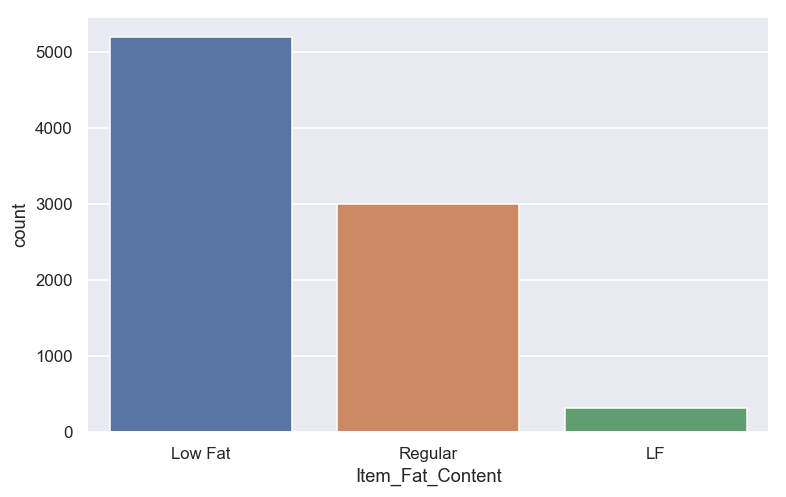

In [128]:
#Using seaborn countplot to plot
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':110})
sns.countplot(df.Item_Fat_Content);

It can be induced that Low Fat items are more in demand.

## 5.  Item_Visibility
    This variable is independent numeric variable which represents percentage of total display area in store allocated to the product.
   

### Description of Item_Visibility

In [129]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

-  Variable is of float data type.
-  With range of values from 0 to 0.3284
-  The minimum value is 0, which means item is not visible at all, this is impractical.

In [130]:
#using value_counts to get count of all unique value and printing the first row
#to see count for 0 visibility
df['Item_Visibility'].value_counts().head(1)

0.0    526
Name: Item_Visibility, dtype: int64

There are 526 items which have 0 visibility according to the data, this need to be fixed cause it's impractical. 

### Distribution of Item_Visibility
    Since our target variable is continuous, we can visualise it by plotting its histogram.

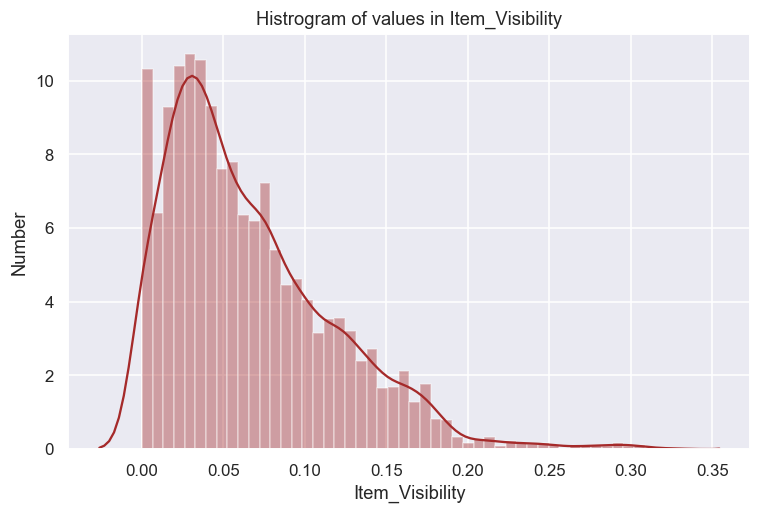

In [131]:
#Using seaborn distplot to plot histrogram excluding missing values
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':110})
sns.distplot(df['Item_Visibility'], color='brown');
plt.ylabel('Number')
plt.xlabel('Item_Visibility')
plt.title('Histrogram of values in Item_Visibility');

In [132]:
print('Skewness = %.4f'%df['Item_Visibility'].skew())

Skewness = 1.1671


-  The graph is right skewed.
-  It can be infered that the stores has more items with less visibility.

### Replacing 0’s in Item_Visibility variable 


#### Mean of Item_Visibility for each Item_Identifier

In [133]:
# #Determine average visibility of a product
# visibility_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')
# visibility_avg.head()

Getting mean of visibility of each Item_Identifier and replacing with 0's in Item_Visibility.



#### Fill mean of Item_Visibility of each Item_Identifier inplace of 0

In [134]:
# #Impute 0 values with mean visibility of that product:
# miss_bool = (df['Item_Visibility'] == 0)

# print ('Number of 0 values initially: %d' %sum(miss_bool))
# df.loc[miss_bool,'Item_Visibility'] = df.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
# print ('Number of 0 values after modification: %d' %sum(df['Item_Visibility'] == 0))

### Distribution of Item_Visibility after Replacing 0’s in Item_Visibility 

    Since our target variable is continuous, we can visualise it by plotting its histogram.

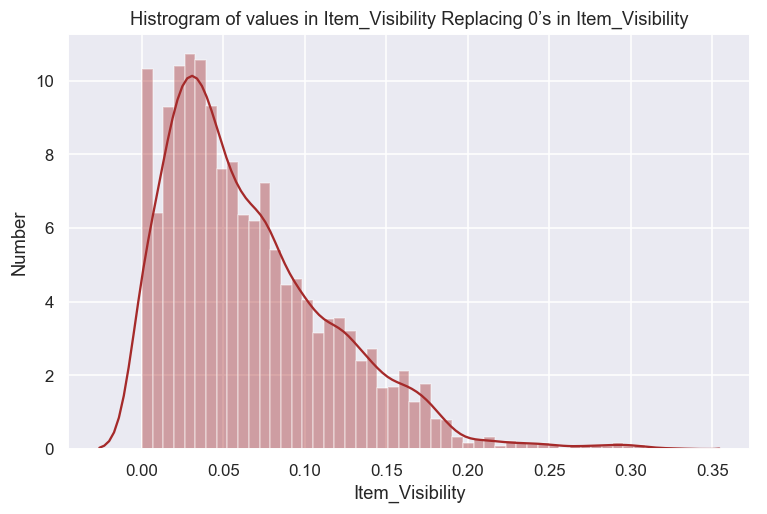

In [135]:
#Using seaborn distplot to plot histrogram excluding missing values
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':110})
sns.distplot(df['Item_Visibility'], color='brown');
plt.ylabel('Number')
plt.xlabel('Item_Visibility')
plt.title('Histrogram of values in Item_Visibility Replacing 0’s in Item_Visibility');

In [136]:
print('Skewness = %.4f'%df['Item_Visibility'].skew())

Skewness = 1.1671


-  The graph is right skewed.
-  It can be infered that the zero's bin has been removed.

## 6.  Item_Type 
    This variable is categorical variable and tells about the type of the product.
   

### Description of Item_Type

In [137]:
df['Item_Type'].describe()

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

-  Variable is of object type
-  It can be noticed that there are 16 unique types of items.

### Unique Item_Type Count

In [138]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

It can be infered that item type such as Fruits and vegetables and Snack foods are more in demand, which make sense.

### Distribution of Item_Type
    Since our variable is categorical, we can visualise it by plotting a countplot.

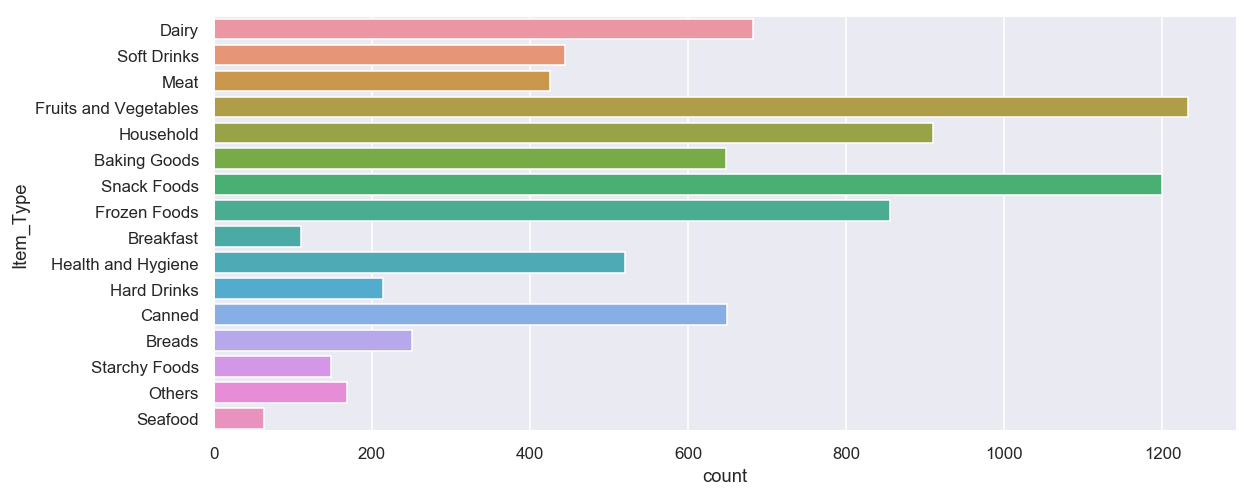

In [139]:
#Using seaborn countplot to plot
sns.set(rc={'figure.figsize':(12,5), 'figure.dpi':110})
sns.countplot(y=df.Item_Type);

It can be noticed that Fruits and Vegetables are more in count.

## 7.  Item_MRP
    This variable is independent numeric variable which represents the market price of the item.
   

### Description of Item_MRP

In [140]:
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

-  Variable is of float data type.
-  With range of values from 31.3 unit to 266.9 unit.

### Distribution of Item_MRP
    Since our target variable is continuous, we can visualise it by plotting its histogram.

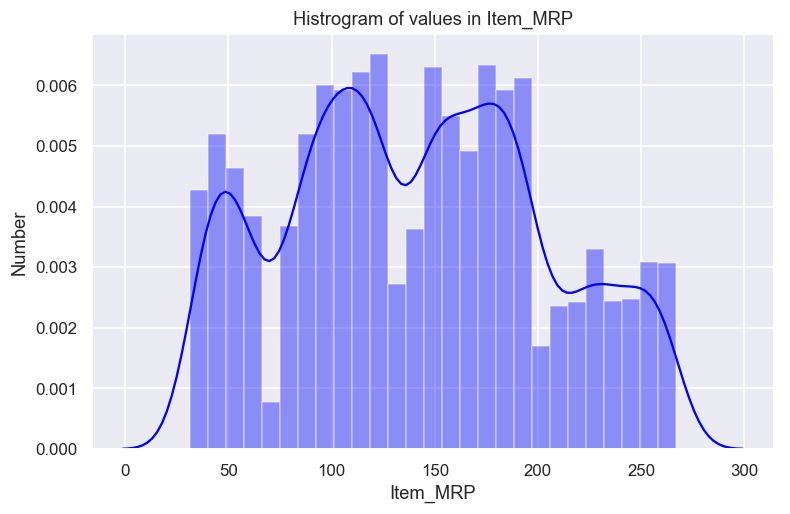

In [141]:
#Using seaborn distplot to plot histrogram excluding missing values
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':110})
sns.distplot(df['Item_MRP'], color='blue');
plt.ylabel('Number')
plt.xlabel('Item_MRP')
plt.title('Histrogram of values in Item_MRP');

In [142]:
print('Skewness = %.4f'%df['Item_MRP'].skew())

Skewness = 0.1272


There is no clear pattern in Item_MRP.

## 8.  Outlet_Identifier 
    This variable is categorical variable and is a Unique Outlet id. Since we need to predict Item_Outlet_Sales we should keep this variable.
   

### Description of Outlet_Identifier 

In [143]:
df['Outlet_Identifier'].describe()

count       8523
unique        10
top       OUT027
freq         935
Name: Outlet_Identifier, dtype: object

-  Variable is of object type
-  There are 10 Outlets in total.

### Distribution of Outlet_Identifier
    Since our variable is categorical, we can visualise it by plotting a countplot.

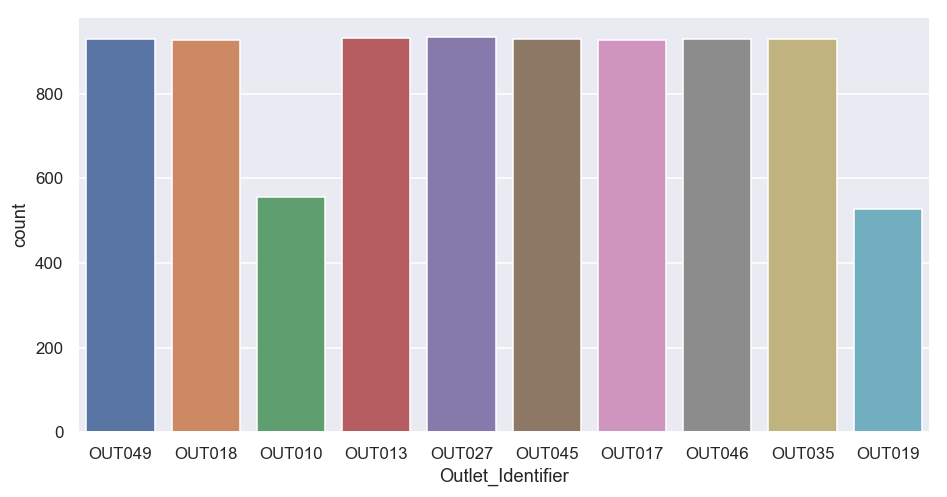

In [144]:
#Using seaborn countplot to plot
sns.set(rc={'figure.figsize':(10,5), 'figure.dpi':110})
sns.countplot(df['Outlet_Identifier']);

### Unique Outlet_Identifier Count

In [145]:
df.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

It can be observed that Outlet 'OUT019' and 'OUT010' have less sale.

## 9.  Outlet_Establishment_Year
    This variable is categorical variable and tells the year when the Outlet was established.
   

### Description of Outlet_Establishment_Year 

In [146]:
df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

All the Outlet were Established between 1985 and 2009.

### Distribution of Outlet_Establishment_Year
    Since our variable is categorical, we can visualise it by plotting a countplot.

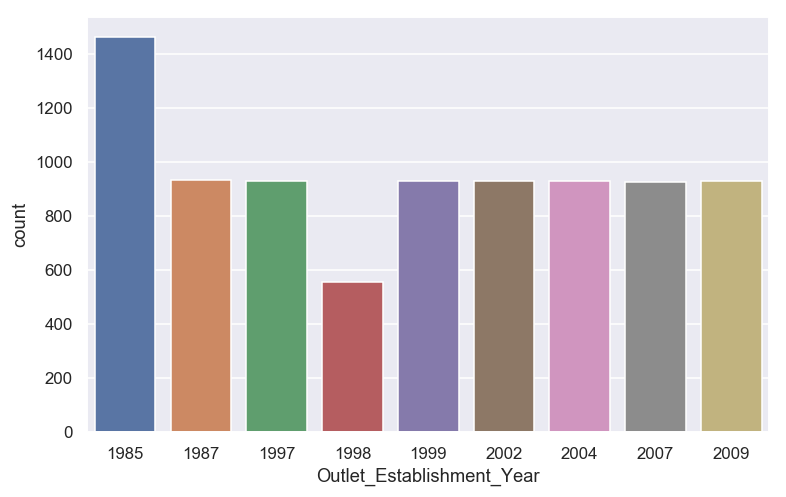

In [147]:
#Using seaborn countplot to plot
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':110})
sns.countplot(df.Outlet_Establishment_Year);

It can infered that 1,463 outlets were established in 1985.

## 10.  Outlet_Size 
    This variable is categorical variable and tells us about the size of the Outlet. We will keep this variable as bigger outlets have more item types, hence more sales practically.
   

### Description of Outlet_Size 

In [148]:
df['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

-  Variable is of object type
-  It can be noticed that there are 3 unique values.
-  Variable has 6,113 columns that indicates about the missing values.

In [149]:
outlet_size_na = df.loc[df['Outlet_Size'].isnull(),['Outlet_Identifier','Outlet_Size']]
outlet_size_na['Outlet_Identifier'].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

-  These outlets have their outlet size missing.
-  We will check for this in the bivariate analysis to substitute the missing values in the Outlet_Size.

### Distribution of Outlet_Size
    Since our variable is categorical, we can visualise it by plotting a countplot.

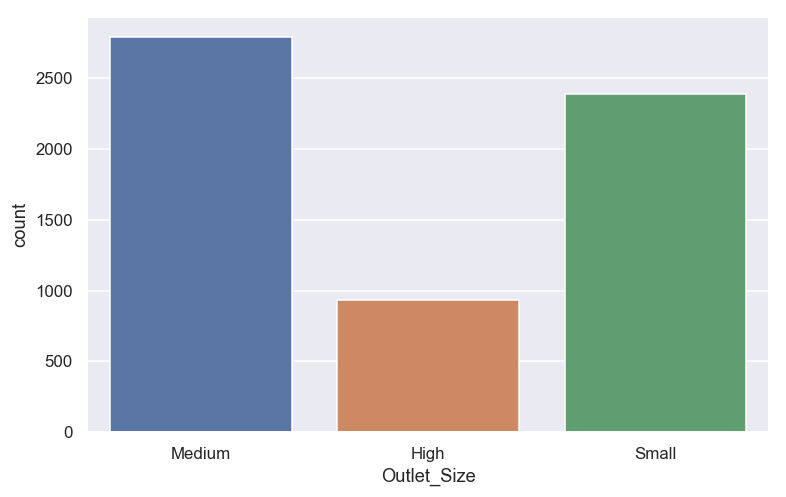

In [150]:
#Using seaborn countplot to plot
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':110})
sns.countplot(df['Outlet_Size']);

It can be induced that there are more outlets of small and medium size.

## 11.  Outlet_Location_Type 
    This variable is categorical variable and tells us about the type of city in which the store is located.
   

### Description of Outlet_Location_Type 

In [151]:
df['Outlet_Location_Type'].describe()

count       8523
unique         3
top       Tier 3
freq        3350
Name: Outlet_Location_Type, dtype: object

-  Variable is of object type
-  It can be noticed that there are 3 unique values.

### Distribution of Outlet_Location_Type
    Since our variable is categorical, we can visualise it by plotting a countplot.

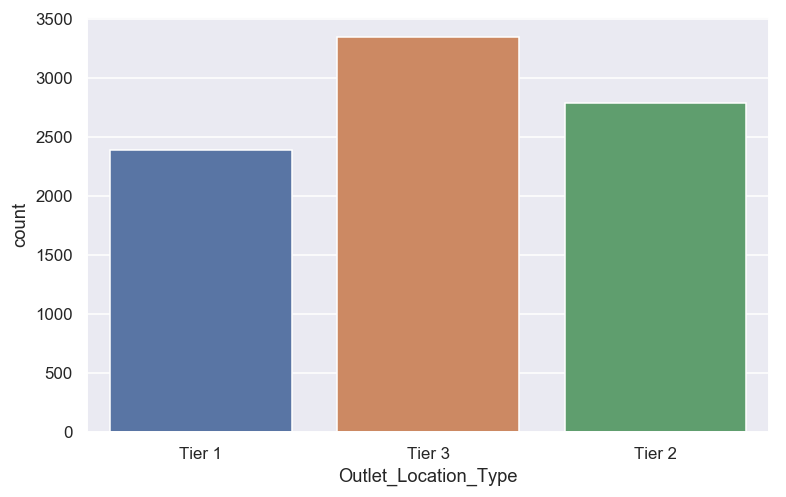

In [152]:
#Using seaborn countplot to plot
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':110})
sns.countplot(df['Outlet_Location_Type']);

There are more outlets in Tier 3 city compared to others.

## 12.  Outlet_Type 
    This variable is categorical variable and tells the outlet is a grocery store or some sort of supermarket.
   

### Description of Outlet_Type 

In [153]:
df['Outlet_Type'].describe()

count                  8523
unique                    4
top       Supermarket Type1
freq                   5577
Name: Outlet_Type, dtype: object

-  Variable is of object type
-  It can be noticed that there are 4 unique values.

### Distribution of Outlet_Type
    Since our variable is categorical, we can visualise it by plotting a countplot.

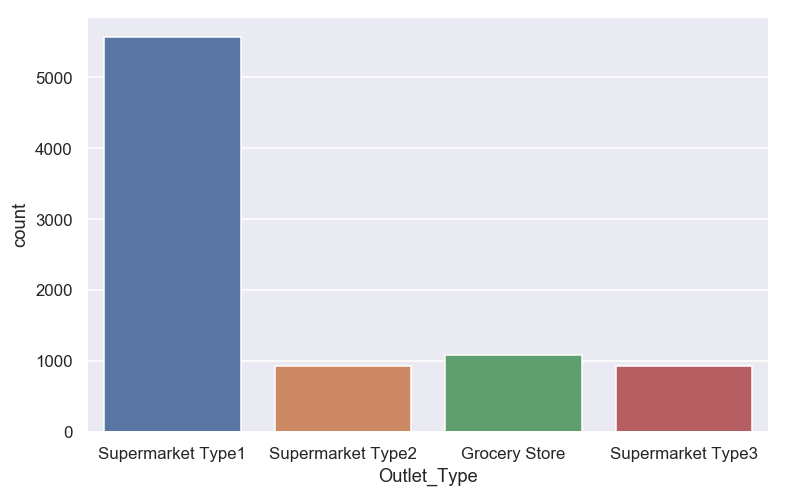

In [154]:
#Using seaborn countplot to plot
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':110})
sns.countplot(df['Outlet_Type']);

There are mostly Supermarket Type 1 outlet types.

## 12. Outlet_Age ( Derived attribute)
    Age of the outlet is the difference between established year and 2019 (current year).

In [155]:
df['Outlet_Age'] = 2019 - df['Outlet_Establishment_Year']

### Description of Outlet_Age 

In [156]:
df['Outlet_Age'].describe()

count    8523.000000
mean       21.168133
std         8.371760
min        10.000000
25%        15.000000
50%        20.000000
75%        32.000000
max        34.000000
Name: Outlet_Age, dtype: float64

-  Variable is of float type
-  IRange of Outlet_Age is from 10 to 34 years.

### Distribution of Outlet_Age
    Since our variable is categorical, we can visualise it by plotting a countplot.

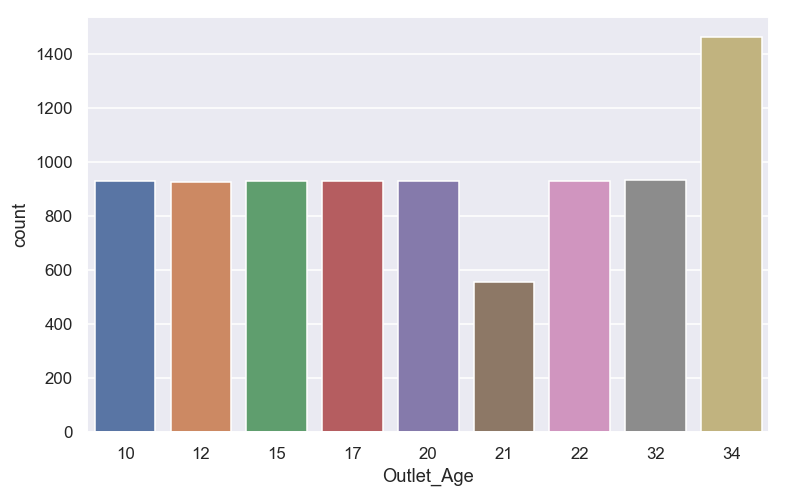

In [157]:
#Using seaborn countplot to plot
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':110})
sns.countplot(df['Outlet_Age']);

There are more outlets which are 34 years old.

### Dropping Outlet_Establishment_Year attribute

In [158]:
df = df.drop(['Outlet_Establishment_Year'], axis=1)

Derived variable Outlet_Age from Outlet_Establishment_Year.


# <u>Bivariate analysis</u>
        Bivariate analysis involves the analysis of two variables, for the purpose of determining the empirical 
        relationship between them.
    

## Corelation plot

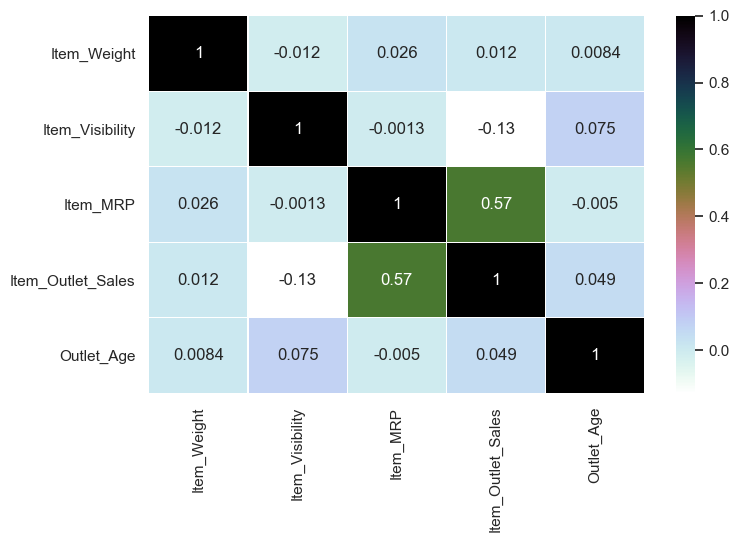

In [159]:
#Using seaborn set to plot heatmap
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
cr = df.corr()
with sns.axes_style("whitegrid"):
    sns.heatmap( cr, cmap='cubehelix_r', annot=True, square=False, linewidth=.1);

 Above table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used as a way to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.


-  Variables with strongest effects on Item_Outlet_Sales are :

  1. Item_MRP ( 0.57)
  2. Outlet_Age ( 0.049)
  3. Item_Weight ( 0.014)


-  Variables with highest correlation coeffecients are :

  1. Outlet_Age and Item_Visibility ( 0.075)
  2. Item_MRP and Item_Weight ( 0.027)




 ## Pairplots
 Plot pairwise relationships in a dataset.

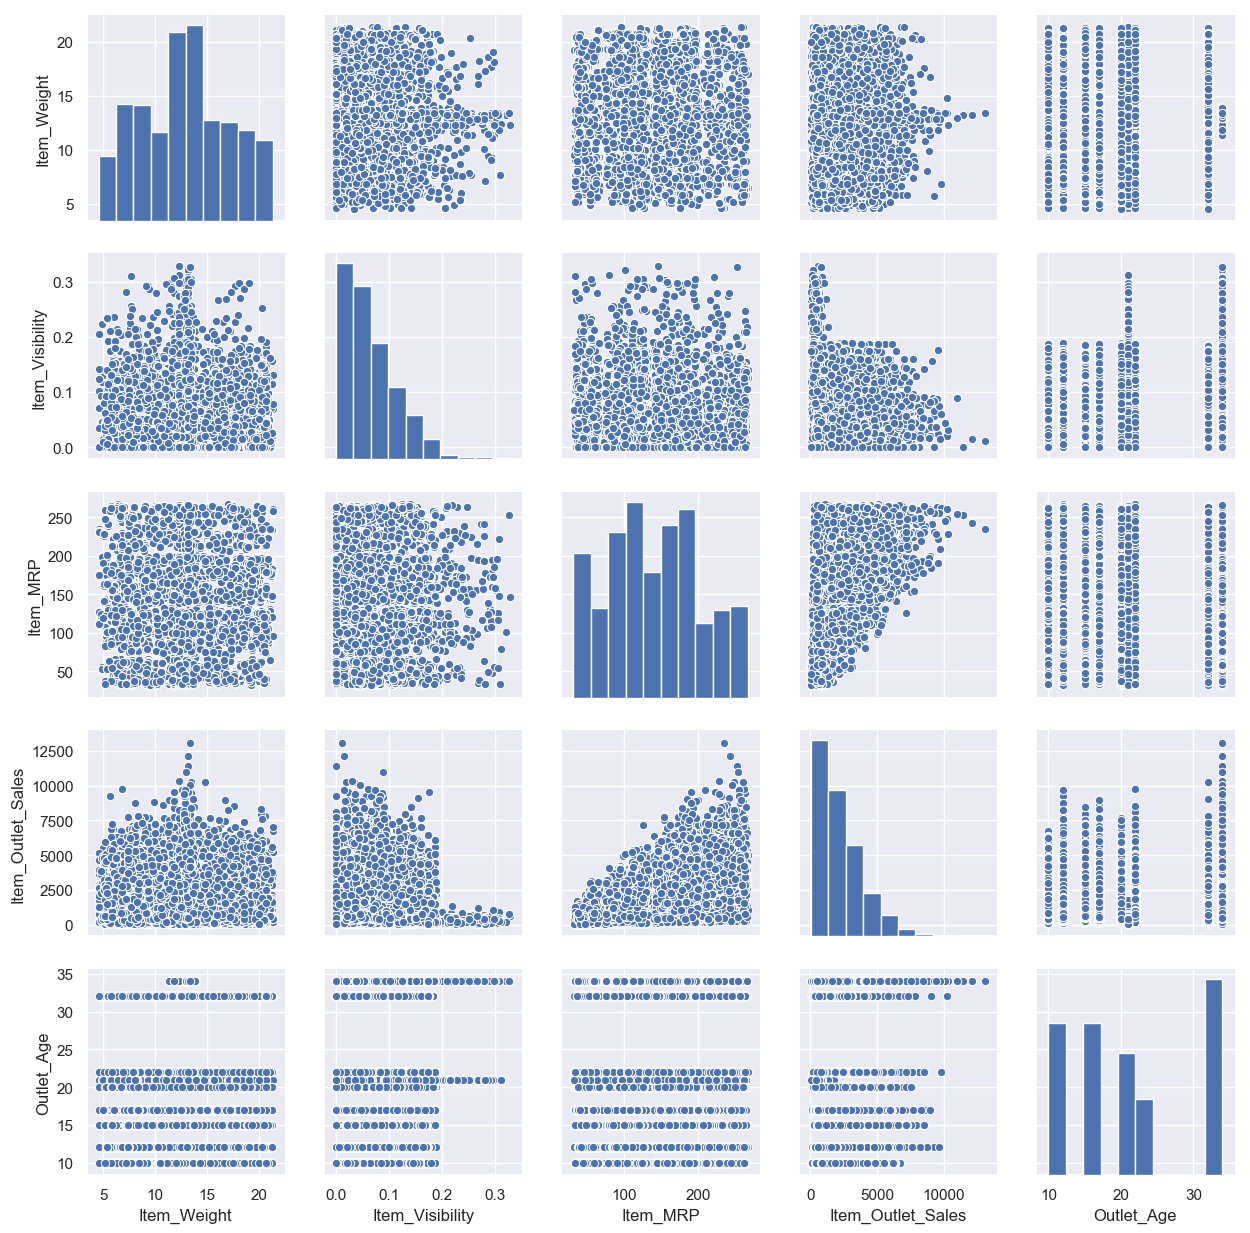

In [160]:
sns.pairplot(df);
np.warnings.filterwarnings('ignore')

## 1. Item_Outlet_Sales vs Item_MRP
    Relation between sales of product in particular store and maximum Retail Price (list price) of product.

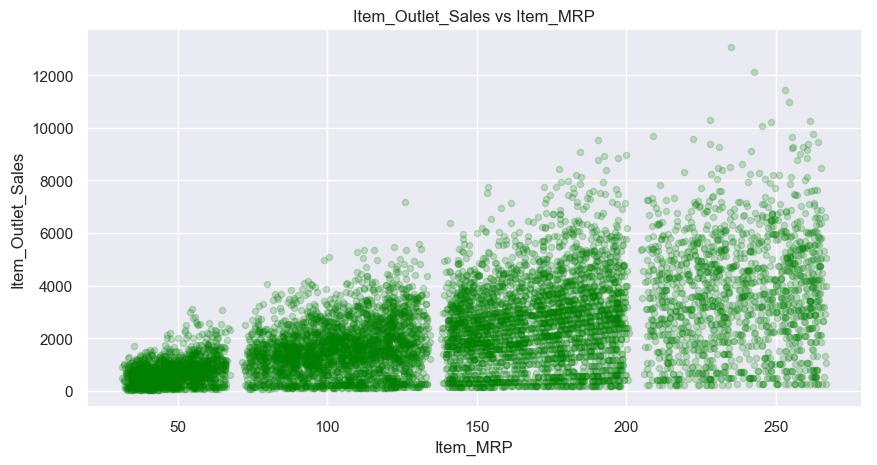

In [161]:
sns.set(rc={'figure.figsize':(10,5), 'figure.dpi':100})
df.plot.scatter(y='Item_Outlet_Sales', x='Item_MRP', alpha=0.2, c='green');
plt.title('Item_Outlet_Sales vs Item_MRP');

-  There are more items with less MRP and less sales.
-  Few outliers with high MRP and high sales.
-  we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.

## 2. Item_Outlet_Sales vs Outlet_Age
    Relation between sales of product in particular store and age of the outlet.

AttributeError: Unknown property jitter

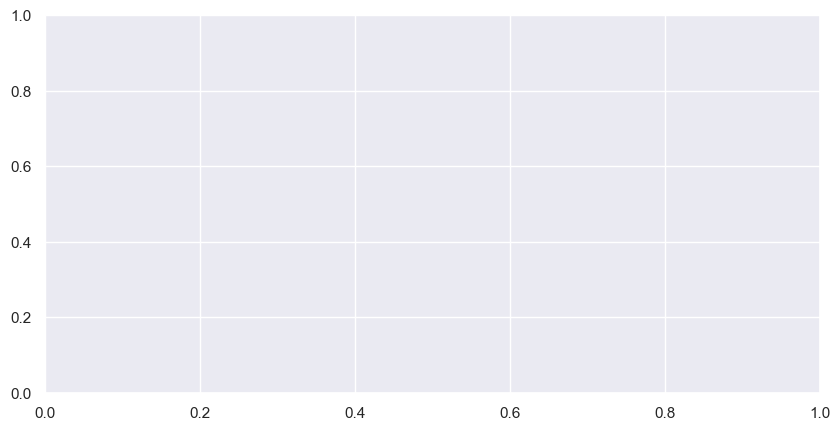

In [183]:
df.plot.scatter(y='Item_Outlet_Sales', x='Outlet_Age', alpha=0.2, c='red', jitter=0.2);
plt.title('Item_Outlet_Sales vs Outlet_Age');

It can be infered that the oldest outlets are the one having greater Item_Outlet_Sales.

## 3. Item_Outlet_Sales vs Item_Weight
    Relation between sales of product in particular store and Weight of product.

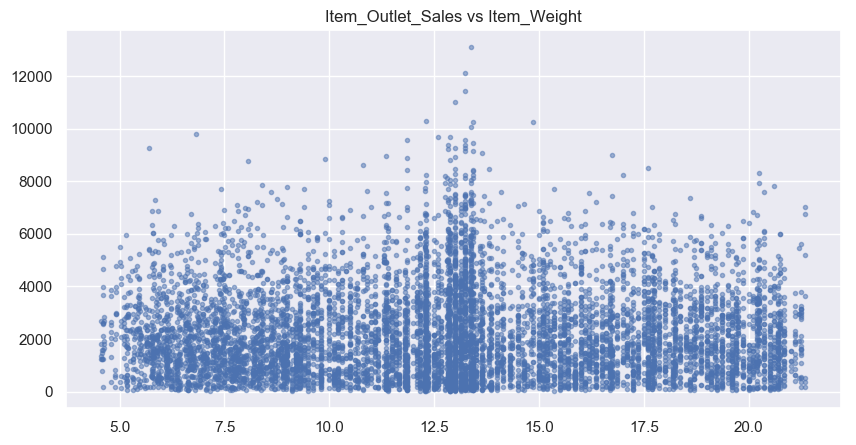

In [163]:
plt.plot(df['Item_Weight'], df['Item_Outlet_Sales'],'.', alpha=0.5);
plt.title('Item_Outlet_Sales vs Item_Weight');

Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern.

## 4. Item_Visibility vs Outlet_Age
    Relation between percentage of total display area in store allocated to this product and age of the outlet.

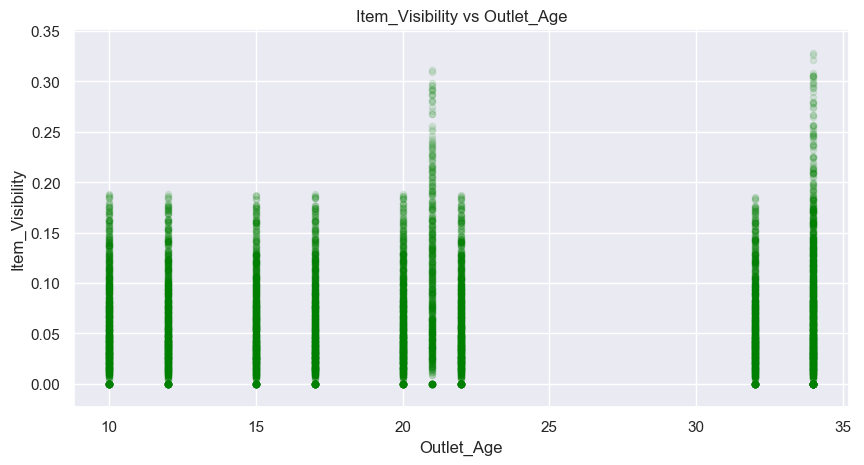

In [164]:
df.plot.scatter(y='Item_Visibility', x='Outlet_Age', alpha=0.1, c='green');
plt.title('Item_Visibility vs Outlet_Age');

Outlets with age between 20-25 and about 35 years old have items more visible than others.


## 5. Item_MRP vs Item_Weight
    Relation between maximum Retail Price (list price) of product and Weight of product.

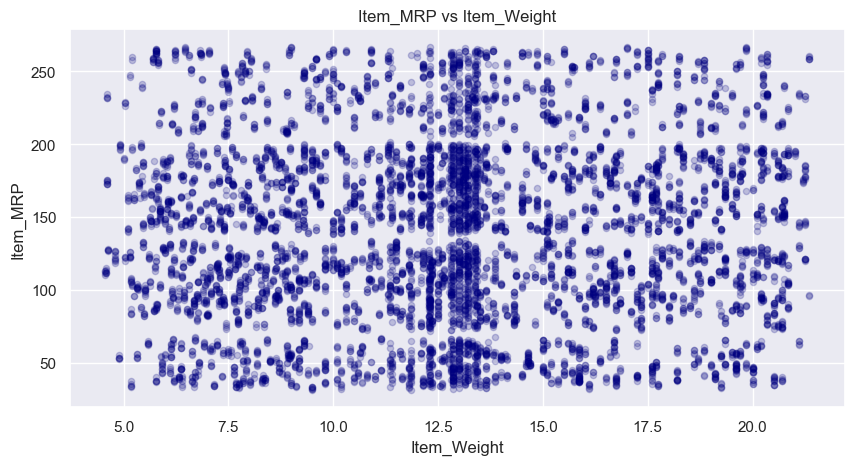

In [165]:
df.plot.scatter(y='Item_MRP', x='Item_Weight', alpha=0.2, c='navy');
plt.title('Item_MRP vs Item_Weight');

No clear pattern.

## 6. Item_Outlet_Sales vs Item_Type
    Relation between sales of product in particular store and Category to which product belongs.

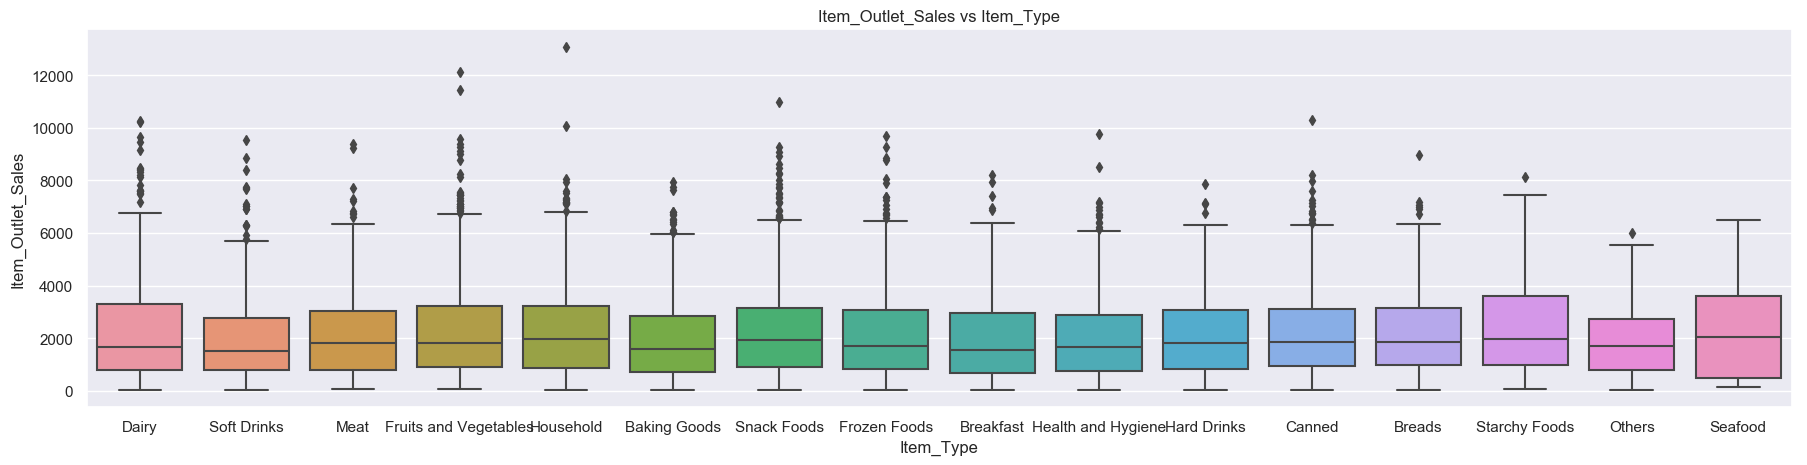

In [166]:
sns.set(rc={'figure.figsize':(22,5), 'figure.dpi':100})
sns.boxplot(y='Item_Outlet_Sales', x='Item_Type', data=df);
plt.title('Item_Outlet_Sales vs Item_Type');

Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct.

## 7. Item_Outlet_Sales vs Item_Fat_Content
    Relation between sales of product in particular store and Wether the product is low fat or not.

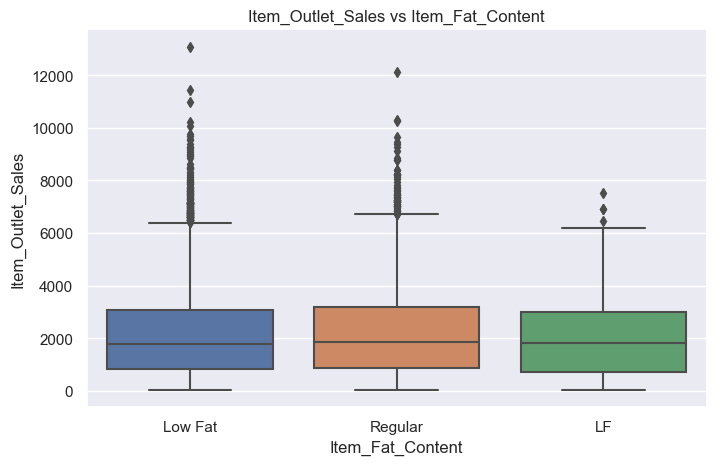

In [167]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.boxplot(y='Item_Outlet_Sales', x='Item_Fat_Content', data=df);
plt.title('Item_Outlet_Sales vs Item_Fat_Content');

Distribution of Item_Outlet_Sales across the categories of Item_Fat_Content is not very distinct.

## 8. Item_Outlet_Sales vs Outlet_Type
    Relation between sales of product in particular store and Grocery store or some sort of supermarket.

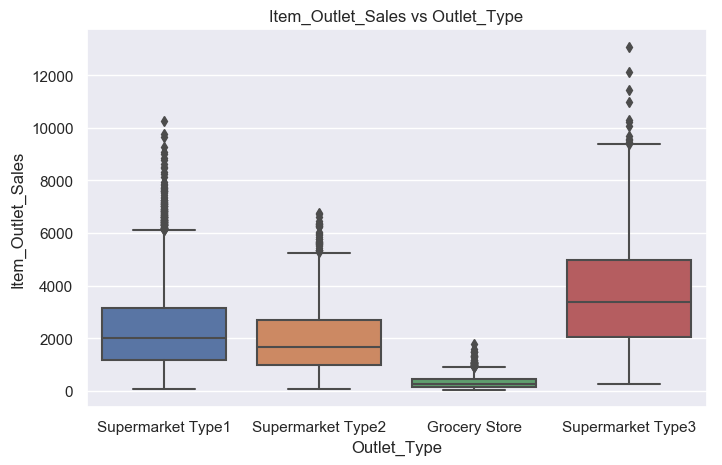

In [168]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.boxplot(y='Item_Outlet_Sales', x='Outlet_Type', data=df);
plt.title('Item_Outlet_Sales vs Outlet_Type');

-  Grocery Store has most of its data points around the lower sales values as compared to the other categories.
-  Supermarket Type3 has better sales compared to other categories.

## 9. Item_Outlet_Sales vs Outlet_Location_Type
    Relation between sales of product in particular store and Type of city in which the store is located.

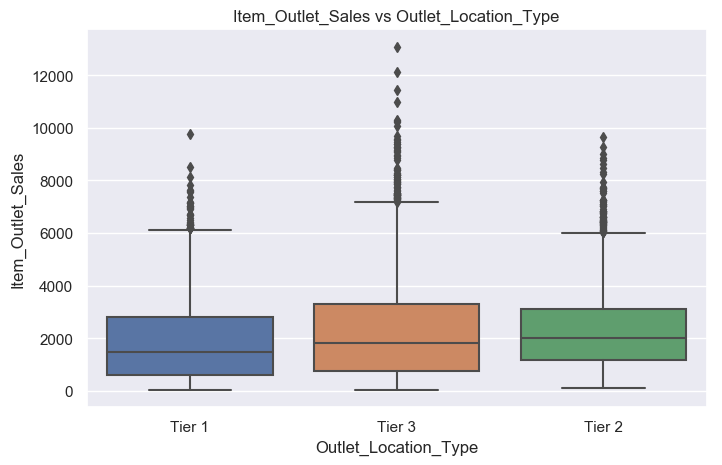

In [169]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.boxplot(y='Item_Outlet_Sales', x='Outlet_Location_Type', data=df);
plt.title('Item_Outlet_Sales vs Outlet_Location_Type');

Distribution of Item_Outlet_Sales across the categories of Outlet_Location_Type is not very distinct.

## 10. Item_Outlet_Sales vs Outlet_Identifier 
    Relation between sales of product in particular store and Unique Store ID.

In [170]:
pivot_sales = df.pivot_table(values='Item_Outlet_Sales', index='Outlet_Identifier')
pivot_sales

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,339.351662
OUT013,2298.995256
OUT017,2340.675263
OUT018,1995.498739
OUT019,340.329723
OUT027,3694.038558
OUT035,2438.841866
OUT045,2192.384798
OUT046,2277.844267


Outlet_Identifier : Average of Item_Outlet_Sales.

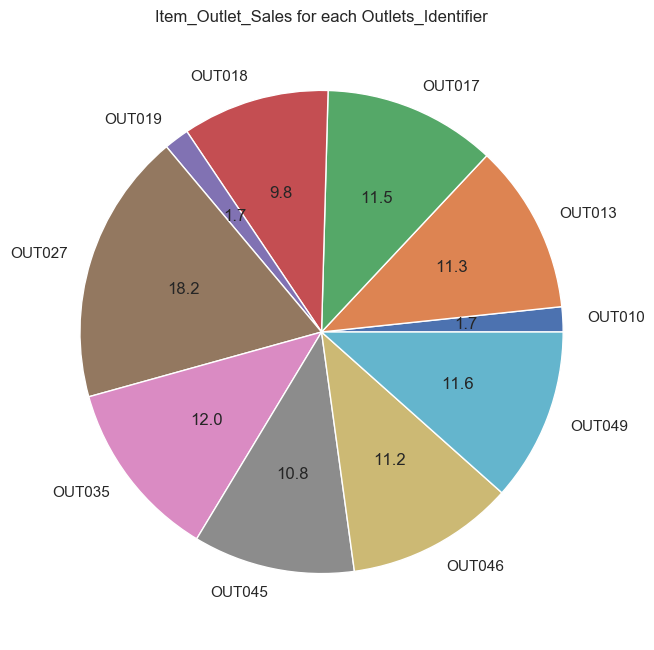

In [171]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
ax.pie( labels=pivot_sales.index, x=pivot_sales.Item_Outlet_Sales ,autopct='%.1f')
ax.set_title("Item_Outlet_Sales for each Outlets_Identifier")
plt.show()

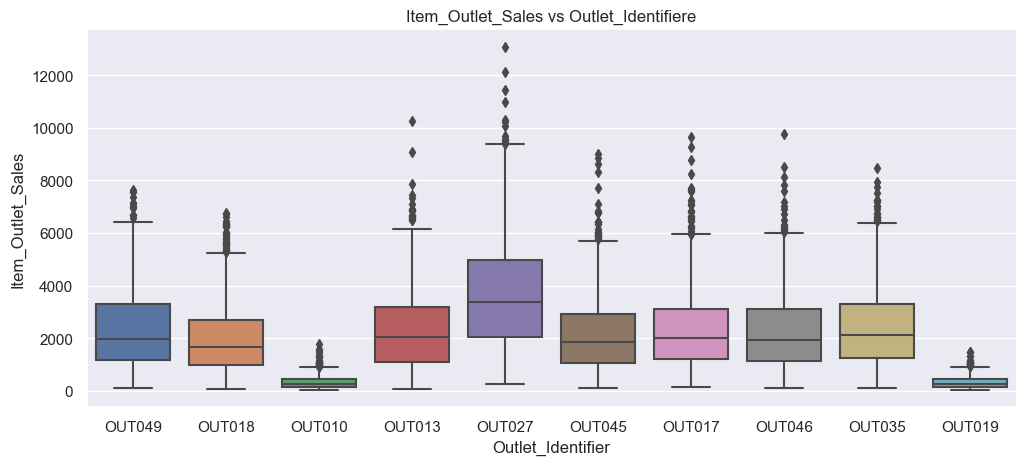

In [172]:
sns.set(rc={'figure.figsize':(12,5), 'figure.dpi':100})
sns.boxplot(y='Item_Outlet_Sales', x='Outlet_Identifier', data=df);
plt.title('Item_Outlet_Sales vs Outlet_Identifiere');

-  Outlet 'OUT010' and 'OUT019' have most of their data points around the lower sales values as compared to the other outlets.
-  Outlet 'OUT027' has better sales compared to other outlets.

## 11. Item_Outlet_Sales vs Outlet_Size
    Relation between sales of product in particular store and size of the outlet.

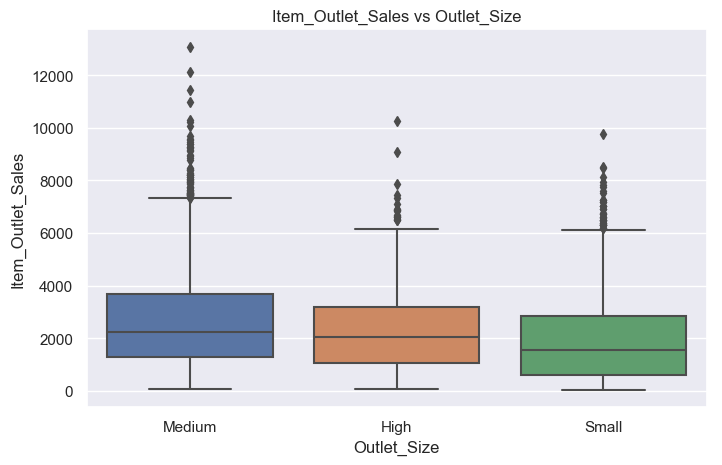

In [173]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.boxplot(y='Item_Outlet_Sales', x='Outlet_Size', data=df);
plt.title('Item_Outlet_Sales vs Outlet_Size');

Distribution of Item_Outlet_Sales across the categories of Outlet_Location_Size is not very distinct.

## 12. Outlet_Location_Type vs Outlet_Size
    Relation between type of city in which the store is located and size of the outlet.

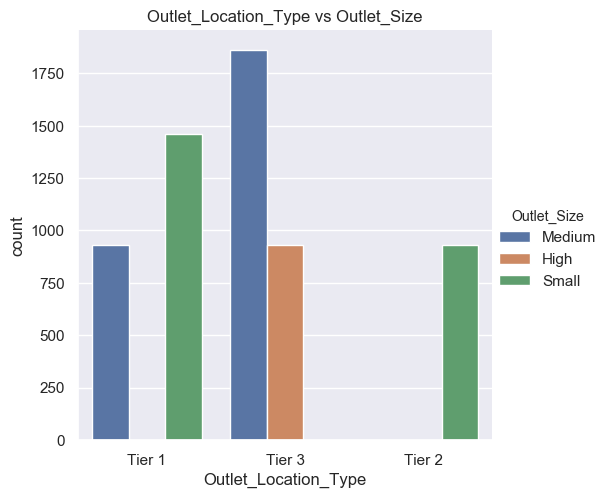

In [174]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.factorplot('Outlet_Location_Type',data = df,hue ='Outlet_Size' ,kind='count');
plt.title('Outlet_Location_Type vs Outlet_Size');

- There are High size and no small outlets in City of type Tier3 only.
- City type Tier2 only have small outlets, while city of type Tier1 have medium and small outlets.


# <u>Multivariate analysis</u>
        Multivariate analysis is based on the statistical principle of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.
    

## Item_Sales_Outlet, Outlet_Type and Item_Fat_Content

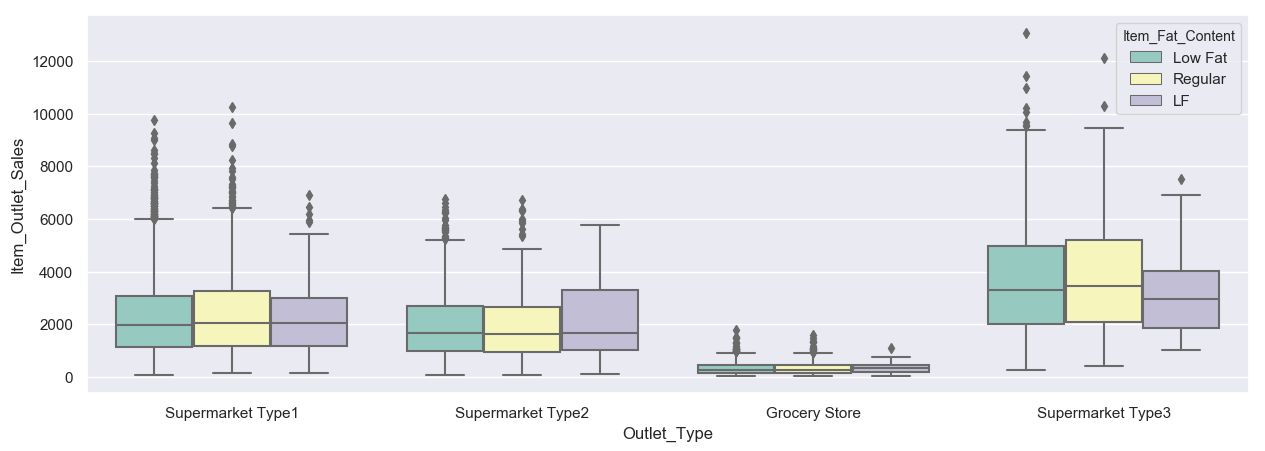

In [175]:
sns.set(rc={'figure.figsize':(15,5), 'figure.dpi':100})
sns.boxplot(hue="Item_Fat_Content", y="Item_Outlet_Sales", x="Outlet_Type", data=df, palette="Set3");

## Outlet_Type, Outlet_Age and Outlet_Size

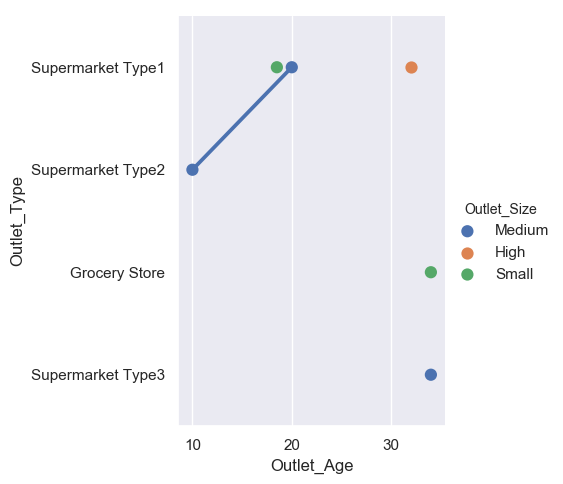

In [176]:
sns.set(rc={'figure.figsize':(10,5), 'figure.dpi':100})
sns.factorplot(y='Outlet_Type',x='Outlet_Age',data = df, hue='Outlet_Size' );

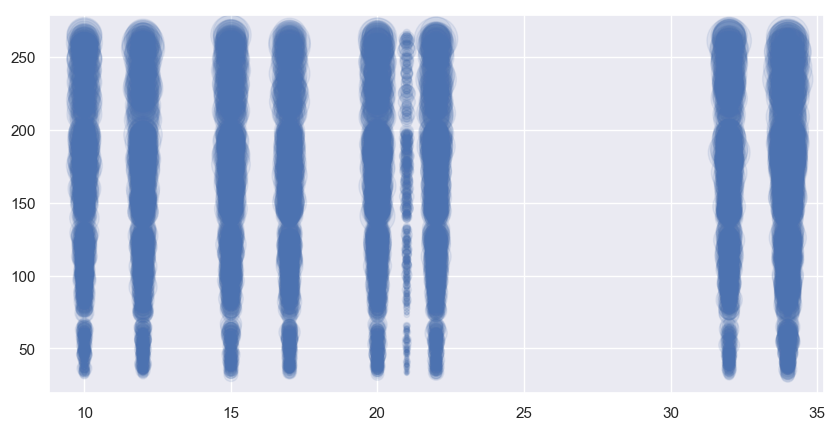

In [177]:
plt.scatter( df['Outlet_Age'], df["Item_MRP"], s=df['Item_Outlet_Sales']*(.1), alpha=0.1, color='b');

Item_Weight : Weight of product

Item_Fat_Content : Wether the product is low fat or not

Item_Visibility : percentage of total display area in store allocated to this product

Item_Type : Category to which product belongs

Item_MRP : Maximum Retail Price (list price) of product

Outlet_Identifier : Unique Store ID

Outlet_Establishment_Year : Year in which store was established

Outlet_Size : Size of the store

Outlet_Location_Type : Type of city in which the store is located

Outlet_Type : Grocery store or some sort of supermarket

Item_Outlet_Sales : Sales of product in particular store. This is the outcome variable to be predicted.


<h5 style="text-align:right"><font color = blue>pranjulgupta0203</font><font color = red>@gmail.com</font></h5>